# AnalisisText 

Nama : Anwar Karnaidi
NIM  : 23917011

# Bagian 1: Pengumpulan Data

Dataset ini berisi artikel berita dari berbagai kategori yang bersumber dari Kaggle (sumber :https://www.kaggle.com/datasets/rmisra/news-category-dataset). Data set ini berisi sekitar 210 ribu berita utama dari tahun 2012 hingga 2022 dari HuffPost. Ini adalah salah satu kumpulan data berita terbesar dan dapat berfungsi sebagai tolok ukur untuk berbagai tugas linguistik komputasional. Jumlah sampel yang ada pada data set ini adalah sebanyak 200,853 sampel artikel berita dan Total ada 42 kategori berita dalam data set dengan format .Json. adapun fitur - fitur yang terdapat pada dataset ini ialah sebagai berikut"
- category: Kategori artikel berita seperti Politics, Business, Sports, Kecantikan, Kesehatan , dan lain - lain
- headline: Judul artikel berita
- authors: Penulis artikel
- link: Tautan ke artikel asli
- short_description: Deskripsi singkat artikel
- date: Tanggal publikasi artikel

In [4]:
import pandas as pd

# Membaca dataset JSON dari Google Drive
url = 'https://drive.google.com/uc?id=19gyow7mP0kz88RzLFWBtOY5U46pmgYZH'
data = pd.read_json(url, lines=True)

# Menampilkan ringkasan dataset
print("Jumlah sampel: ", data.shape[0])
print("Fitur-fitur: ", data.columns.tolist())
data.head()


Jumlah sampel:  209527
Fitur-fitur:  ['link', 'headline', 'category', 'short_description', 'authors', 'date']


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


# Bagian 2: Pra-Pemrosesan Teks

Langkah-langkah Pra-Pemrosesan yang dilakukan:
1. Tokenisasi yaitu memecah teks menjadi kata-kata individu.
2. Penghapusan Stopwords yaitu menghapus kata-kata umum yang tidak memberikan informasi penting, seperti 'it', 'is', 'to'.
3. Stemming yaitu mengubah kata-kata menjadi bentuk dasarnya menggunakan algoritma Porter Stemmer.
4. Lowercasing yaitu mengubah semua teks menjadi huruf kecil untuk konsistensi.
5. Menghapus tanda baca dan karakter khusus untuk mengurangi noise dalam teks

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import re

# Mengunduh stopwords dan punktuasi
nltk.download('stopwords')
nltk.download('punkt')

# Fungsi untuk pra-pemrosesan teks
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Menghapus tanda baca dan karakter khusus
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    # Tokenisasi
    words = word_tokenize(text)
    # Menghapus stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Menampilkan teks sebelum dan sesudah pra-pemrosesan
sample_text = data['short_description'][0]
print("Teks sebelum pra-pemrosesan: ", sample_text)
preprocessed_text = preprocess_text(sample_text)
print("Teks sesudah pra-pemrosesan: ", preprocessed_text)

# Menerapkan pra-pemrosesan ke seluruh dataset
data['preprocessed_description'] = data['short_description'].apply(preprocess_text)

# Menampilkan beberapa contoh teks setelah pra-pemrosesan
data[['short_description', 'preprocessed_description']].head()


[nltk_data] Downloading package stopwords to C:\Users\A S U
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\A S U
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Teks sebelum pra-pemrosesan:  Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.
Teks sesudah pra-pemrosesan:  health expert said earli predict whether demand would match 171 million dose new booster us order fall


,short_description,preprocessed_description
0,Health experts said it is too early to predict...,health expert said earli predict whether deman...
1,He was subdued by passengers and crew when he ...,subdu passeng crew fled back aircraft confront...
2,"""Until you have a dog you don't understand wha...",dog dont understand could eaten
3,"""Accidentally put grown-up toothpaste on my to...",accident put grownup toothpast toddler ’ tooth...
4,Amy Cooper accused investment firm Franklin Te...,ami cooper accus invest firm franklin templeto...


Hasil output menunjukkan bahwa teks telah diproses dengan benar, menghapus tanda baca, menghapus stopwords, melakukan stemming, dan mengubah teks menjadi huruf kecil.

# Bagian 3: Rekayasa Fitur (Feature Engineering)

Pada bagian ini diterapkan dua teknik ekstraksi fitur pada data teks yang telah dikumpulkan yaitu TF-IDF dan Word2Vec.

**1. TF-IDF (Term Frequency-Inverse Document Frequency)**

Konsep TF-IDF adalah metode untuk menilai pentingnya sebuah kata dalam dokumen relatif terhadap keseluruhan korpus (kumpulan dokumen). Ini merupakan gabungan dari dua metrik yaitu:

- Term Frequency (TF) untuk mengukur seberapa sering sebuah kata muncul dalam sebuah dokumen.
- Inverse Document Frequency (IDF)untuk mengukur seberapa sering sebuah kata muncul di seluruh dokumen. Untuk kata yang lebih jarang muncul di dokumen lain akan memiliki nilai IDF yang lebih tinggi pula.

Rumus untuk perhitungan manual TF-IDF untuk sebuah kata (t) dalam sebuah dokumen (d) adalah:
*TF-IDF(t,d)=TF(t,d)×IDF(t)*

Dimana:

          
TF(t,d) = Total kata dalam d / Total kata dalam d

IDF(t)=log( Total dokumen / Jumlah dokumen yang mengandung t)



In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menggunakan deskripsi pendek yang sudah dipreproses
corpus = data['preprocessed_description'].tolist()

# Membuat representasi TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Menampilkan ukuran matriks TF-IDF
print("Ukuran matriks TF-IDF: ", tfidf_matrix.shape)
print("Contoh representasi TF-IDF: \n", tfidf_matrix[0])


Ukuran matriks TF-IDF:  (209527, 68421)
Contoh representasi TF-IDF: 
   (0, 21708)	0.21820675376060347
  (0, 44509)	0.2202620997649142
  (0, 64106)	0.14608044458058145
  (0, 9840)	0.36829086969273206
  (0, 42107)	0.14367603072674734
  (0, 18645)	0.2788397099958337
  (0, 39484)	0.2038924721653614
  (0, 781)	0.4138173387622132
  (0, 37982)	0.26678998278391686
  (0, 67153)	0.16491055804286905
  (0, 17208)	0.24807114005909675
  (0, 66297)	0.20131802912960378
  (0, 48254)	0.2663386545099611
  (0, 19451)	0.22618832378610854
  (0, 52634)	0.15387465925405722
  (0, 21353)	0.23383952882452436
  (0, 27865)	0.18650749082851786


**2. Word2Vec**

Konsep Word2Vec adalah teknik untuk memetakan kata-kata ke dalam vektor-vektor numerik dengan dimensi tetap, yang biasanya menggunakan model pembelajaran mendalam. Model ini menangkap hubungan semantik antara kata-kata berdasarkan konteks di mana kata-kata tersebut muncul.

Word2Vec memiliki dua arsitektur utama yaitu:
- Continuous Bag of Words (CBOW) untuk melakukan prediksi sebuah kata berdasarkan konteks (kata-kata tetangga).
- Skip-gram untuk memprediksi konteks (kata-kata tetangga) berdasarkan sebuah kata.

NB: sebelumnya dilakukan pengunduhan model pre-trained Word2Vec dimana salah satu model yang banyak digunakan adalah model Google News vectors yang bisa diunduh dari https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g (file size : 3,558 Gb), kemudian dilakukan akses terhadap file direktori tersebut.

Dalam upaya mengoptimalkan proses dan memastikan apakah model sedang berjalan dengan benar, berikut ini adalah beberapa langkah yang akan dilakukan:

**1. Verifikasi data untuk memaastikan data yang digunakan benar-benar dimuat dan diproses dengan benar dengan melakukan pengecekan ukuran dataset dan contoh beberapa data.**

In [18]:
# Memeriksa ukuran dan contoh data
print(data.shape)
print(data.head())


(209527, 7)
                                                link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you 

**2. Pengurangan ukuran dataset untuk pengujianpada saat mengembangkan dan menguji kode, dapat menggunakan subset dari data untuk mempercepat proses.**

In [19]:
# Menggunakan subset data untuk pengujian
data_sample = data.sample(n=1000, random_state=42)  # Menggunakan 1000 sampel sebagai contoh yang diambil
corpus_sample = data_sample['preprocessed_description'].tolist()
tokenized_corpus_sample = [text.split() for text in corpus_sample]


**3. Memantau proses pelatihan**

Dikarenakan belum adanya library gensim, terlebih dahulu dilakukan proses instalasi gensim sebagi berikut:

In [30]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



Gensim menyediakan cara untuk memantau proses pelatihan model Word2Vec, dengan mengaktifkan logging untuk melihat kemajuan pelatihan dalam melatih model Word2Vec.

In [31]:
import logging
from gensim.models import Word2Vec

nltk.download('punkt')

# Mengaktifkan logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Memuat data
url = 'https://drive.google.com/uc?id=19gyow7mP0kz88RzLFWBtOY5U46pmgYZH'
data = pd.read_json(url, lines=True)
# Pra-pemrosesan dan tokenisasi data
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    return text

data['preprocessed_description'] = data['short_description'].apply(preprocess_text)
tokenized_corpus_sample = data['preprocessed_description'].apply(word_tokenize)

# Melatih model Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_corpus_sample, vector_size=100, window=5, min_count=2, workers=4)

# Menyimpan model
word2vec_model.save("word2vec_model.model")

# Mendapatkan embedding untuk kata 'news'
word_vector = word2vec_model.wv['news']
print("Vektor untuk kata 'news': \n", word_vector)


[nltk_data] Downloading package punkt to C:\Users\A S U
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2024-06-18 15:58:25,287 : INFO : collecting all words and their counts
2024-06-18 15:58:25,295 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-06-18 15:58:25,340 : INFO : PROGRESS: at sentence #10000, processed 179786 words, keeping 18908 word types
2024-06-18 15:58:25,385 : INFO : PROGRESS: at sentence #20000, processed 320346 words, keeping 25081 word types
2024-06-18 15:58:25,406 : INFO : PROGRESS: at sentence #30000, processed 470285 words, keeping 30339 word types
2024-06-18 15:58:25,446 : INFO : PROGRESS: at sentence #40000, processed 615730 words, keeping 34776 word types
2024-06-18 15:58:25,475 : INFO : PROGRESS: at sentence #50000, processed 745266 words, keeping 37840 word types
2024-06-18 15:58:25,500 : INFO : PROGRESS: at sentence #60000, processed 871925 words, keeping 40854 word types
2024

Vektor untuk kata 'news': 
 [ 1.0335311   0.28164318  0.95006996 -0.17608443  0.2517899  -3.5497952
 -0.8634695   3.504654   -1.2306672  -1.4375052   0.32789353 -1.2429616
  0.44373286  0.7938028  -1.4388826  -3.679758   -0.43720344 -0.2169205
  0.7983172  -1.4412686   1.9382876   1.0067521  -1.5219228   1.472937
  0.37041914 -0.7295593  -2.4838295   0.03915254 -1.0000063  -0.4190966
  0.21112189  2.160409    0.89408785  0.8113702  -0.40800005  1.5995837
 -0.7023458   1.7380692   0.9184169  -0.856271   -2.0911343  -0.3006715
 -0.956596    2.0686047  -0.7814666   1.9772512   1.5685933  -2.2837267
  1.8154141  -0.48601827  2.1704698  -2.1652565  -1.4733576   0.47858325
  1.2457612  -2.2121534   0.9932402   0.30213058  0.8065887   0.4351802
  0.83312196 -0.3045917  -2.8370833  -1.91821    -0.01741682  1.7913777
  2.2185686   0.31525016  0.3024953  -1.1626694  -0.24618563 -0.73609793
  1.2969066   1.0706353   1.2887837   1.2083596  -1.0261793   0.16855839
 -1.5093886   0.9016461   1.506561

In [23]:
#import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Pelatihan model dengan logging diaktifkan
word2vec_model = Word2Vec(sentences=tokenized_corpus_sample, vector_size=100, window=5, min_count=2, workers=4)


2024-06-18 12:00:56,076 : INFO : collecting all words and their counts
2024-06-18 12:00:56,078 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-06-18 12:00:56,164 : INFO : PROGRESS: at sentence #10000, processed 179786 words, keeping 18908 word types
2024-06-18 12:00:56,228 : INFO : PROGRESS: at sentence #20000, processed 320346 words, keeping 25081 word types
2024-06-18 12:00:56,294 : INFO : PROGRESS: at sentence #30000, processed 470285 words, keeping 30339 word types
2024-06-18 12:00:56,383 : INFO : PROGRESS: at sentence #40000, processed 615730 words, keeping 34776 word types
2024-06-18 12:00:56,460 : INFO : PROGRESS: at sentence #50000, processed 745266 words, keeping 37840 word types
2024-06-18 12:00:56,532 : INFO : PROGRESS: at sentence #60000, processed 871925 words, keeping 40854 word types
2024-06-18 12:00:56,611 : INFO : PROGRESS: at sentence #70000, processed 1009706 words, keeping 43946 word types
2024-06-18 12:00:56,691 : INFO : PROGRESS: at

**4. Menggunakan Model Pre-trained**

Menggunakan model Word2Vec yang sudah dilatih sebelumnya untuk mempercepat proses, namun ini hanya oposional saja

In [25]:
from gensim.models import KeyedVectors

# Memuat model Word2Vec yang sudah dilatih sebelumnya
pretrained_model_path = 'D:/jupiter/GoogleNews-vectors-negative300.bin'
pretrained_model = KeyedVectors.load_word2vec_format(pretrained_model_path, binary=True)

# Mendapatkan embedding untuk sebuah kata contoh dari model pre-trained
word_vector = pretrained_model['news']
print("Vektor untuk kata 'news': \n", word_vector)


2024-06-18 12:01:35,076 : INFO : loading projection weights from D:/jupiter/GoogleNews-vectors-negative300.bin
2024-06-18 12:02:14,553 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from D:/jupiter/GoogleNews-vectors-negative300.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2024-06-18T12:02:14.529007', 'gensim': '4.3.0', 'python': '3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'load_word2vec_format'}


Vektor untuk kata 'news': 
 [-0.13867188  0.04370117 -0.13085938 -0.16796875 -0.06054688 -0.07080078
  0.00854492 -0.09960938  0.19628906  0.14648438 -0.23046875 -0.09619141
 -0.140625    0.25585938 -0.16699219  0.14257812 -0.16992188  0.06884766
  0.23925781 -0.28515625  0.17089844  0.17089844  0.05615234 -0.06445312
  0.13867188  0.32226562  0.05078125  0.27148438 -0.00564575  0.02587891
 -0.05639648  0.03125     0.171875   -0.18261719  0.05029297 -0.01062012
 -0.02600098  0.20019531 -0.07568359  0.125       0.01300049 -0.17089844
 -0.09667969  0.21972656  0.06494141  0.24804688  0.11083984  0.0267334
 -0.10986328  0.17578125  0.328125   -0.11865234  0.03222656  0.30273438
  0.09179688 -0.05224609 -0.27539062 -0.046875    0.20996094 -0.20410156
  0.10595703 -0.08398438 -0.09765625 -0.16015625 -0.0045166   0.09228516
  0.05737305 -0.04418945  0.06445312  0.16992188 -0.06396484  0.02160645
  0.01672363  0.01916504 -0.14453125  0.22949219 -0.14746094  0.05859375
  0.00610352 -0.08544922

**5. Pelatihan Ulang Model**

Mencoba mengurangi parameter model seperti "vector_size", "window", atau "min_count". ini dilakukan hanya sebatas membandingkan performa pelatihan

In [26]:
# Mengaktifkan logging untuk memantau proses pelatihan
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Mengunduh stopwords dan punktuasi
nltk.download('stopwords')
nltk.download('punkt')

# Membaca dataset JSON dari Google Drive
url = 'https://drive.google.com/uc?id=19gyow7mP0kz88RzLFWBtOY5U46pmgYZH'
data = pd.read_json(url, lines=True)

# Fungsi untuk pra-pemrosesan teks
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Menghapus tanda baca dan karakter khusus
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    # Tokenisasi
    words = word_tokenize(text)
    # Menghapus stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Menerapkan pra-pemrosesan ke seluruh dataset
data['preprocessed_description'] = data['short_description'].apply(preprocess_text)

# Memuat model Word2Vec yang sudah dilatih sebelumnya
pretrained_model_path = 'D:/jupiter/GoogleNews-vectors-negative300.bin'
pretrained_model = KeyedVectors.load_word2vec_format(pretrained_model_path, binary=True)

# Mendapatkan embedding untuk seluruh teks
def get_document_embedding(doc):
    words = doc.split()
    word_vectors = [pretrained_model[word] for word in words if word in pretrained_model]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(pretrained_model.vector_size)

data['word2vec_embedding'] = data['preprocessed_description'].apply(get_document_embedding)

# Menampilkan contoh embedding untuk sebuah dokumen
print("Embedding untuk sebuah dokumen: \n", data['word2vec_embedding'][0])


[nltk_data] Downloading package stopwords to C:\Users\A S U
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\A S U
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2024-06-18 12:05:31,926 : INFO : loading projection weights from D:/jupiter/GoogleNews-vectors-negative300.bin
2024-06-18 12:06:11,120 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from D:/jupiter/GoogleNews-vectors-negative300.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2024-06-18T12:06:11.120512', 'gensim': '4.3.0', 'python': '3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'load_word2vec_format'}


Contoh embedding untuk sebuah dokumen: 
 [ 0.05014648  0.05518799  0.0469696   0.08275554 -0.02878418  0.03463949
  0.11437581 -0.13169353  0.06467285  0.01708984 -0.06606852 -0.09624024
  0.01894124 -0.02067464 -0.1769511   0.09838054 -0.02208659  0.0855306
  0.04401016 -0.05684407 -0.03813375  0.00349833  0.00938975 -0.03141276
  0.02638346 -0.05638021 -0.08628743  0.05456543 -0.03959147  0.01916911
 -0.05420939  0.00513509 -0.06421992 -0.06815592  0.00228678  0.01337891
 -0.00997925  0.00263875  0.00113169  0.03799438  0.02225749 -0.09936727
  0.134375   -0.02633464 -0.07100627 -0.18334961  0.01425781 -0.01370443
 -0.04660644  0.03820496  0.00634766 -0.008402   -0.07589925 -0.02024231
  0.08127848 -0.00623372  0.00123291 -0.10059814  0.0341919  -0.0654714
 -0.07884929 -0.04730631 -0.08950195  0.015979    0.07203776 -0.00268326
 -0.01073405  0.12434076 -0.00473022  0.05917765  0.00926005 -0.01199544
  0.14344254  0.02810262 -0.09822591 -0.02542114  0.03711459  0.12528585
  0.02098796

# Bagian 4: Analisis Data Eksploratif dan Visualisasi

Berikut adalah langkah-langkah dan kode untuk melakukan analisis data eksploratif dan visualisasi pada data teks yang sudah diproses:

**1. Membuat Word Cloud**

Word cloud adalah representasi visual dari teks di mana ukuran setiap kata menunjukkan frekuensi atau pentingnya kata tersebut. Dikarenakan belum adanya library Word Cloud, terlebih dahulu dilakukan instalasi Word Cloud.

In [7]:
!pip install wordcloud matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ------------------- -------------------- 143.4/300.2 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.7 MB/s eta 0:00:00


**2. Distribusi Panjang Teks**

Plot distribusi panjang teks (jumlah kata per dokumen) memberikan gambaran tentang seberapa panjang teks-teks dalam dataset.

**3. Frekuensi Kata Teratas**

Plot bar untuk memvisualisasikan frekuensi kata-kata teratas yang paling sering muncul dalam teks.

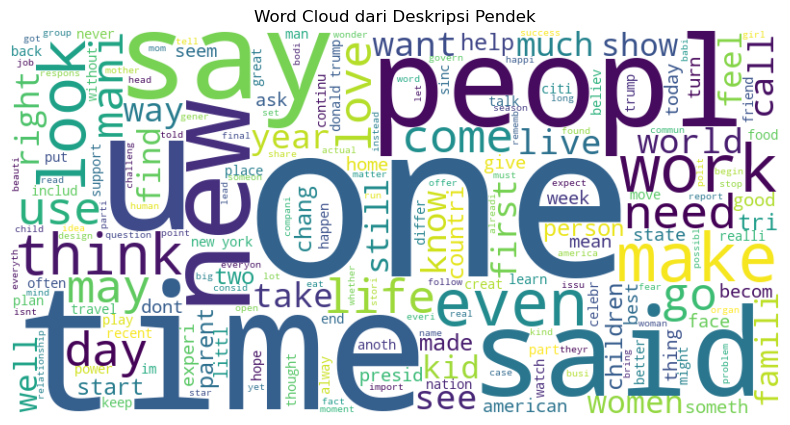

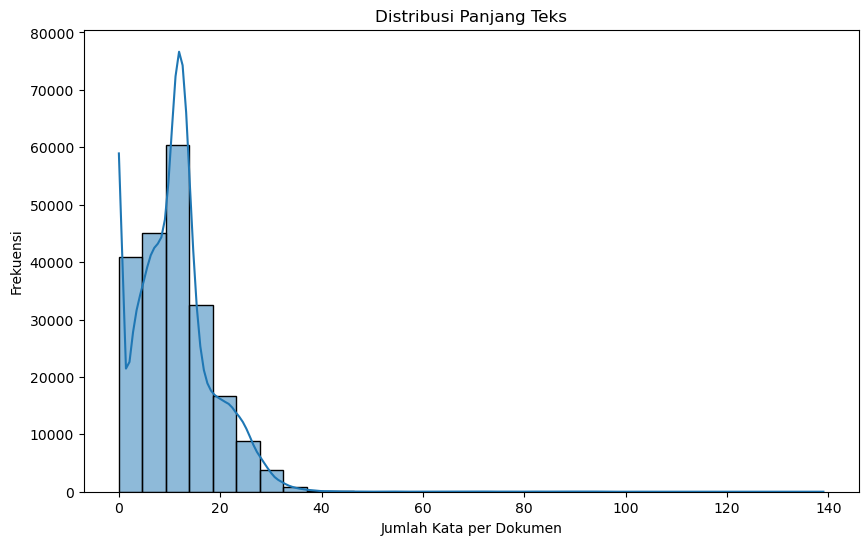

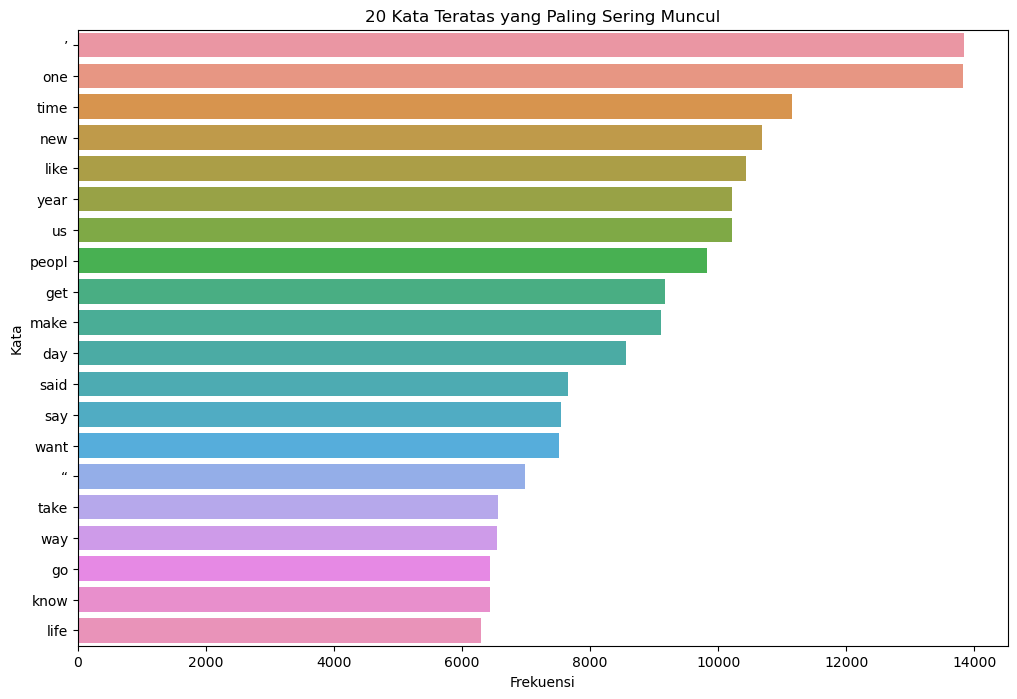

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Fungsi untuk pra-pemrosesan teks
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Membaca dataset JSON dari Google Drive
url = 'https://drive.google.com/uc?id=19gyow7mP0kz88RzLFWBtOY5U46pmgYZH'
data = pd.read_json(url, lines=True)

# Menerapkan pra-pemrosesan ke seluruh dataset
data['preprocessed_description'] = data['short_description'].apply(preprocess_text)

# Membuat Word Cloud
text = ' '.join(data['preprocessed_description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Deskripsi Pendek')
plt.show()

# Distribusi Panjang Teks
data['text_length'] = data['preprocessed_description'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=30, kde=True)
plt.title('Distribusi Panjang Teks')
plt.xlabel('Jumlah Kata per Dokumen')
plt.ylabel('Frekuensi')
plt.show()

# Frekuensi Kata Teratas
all_words = ' '.join(data['preprocessed_description']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

words = [word[0] for word in common_words]
counts = [word[1] for word in common_words]

plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=words)
plt.title('20 Kata Teratas yang Paling Sering Muncul')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()


**Penjelasan:**
1. Pra-Pemrosesan Teks:
- Mengubah teks menjadi huruf kecil.
- Menghapus tanda baca.
- Melakukan tokenisasi teks.
- Menghapus stopwords.
- Melakukan stemming pada kata-kata.

2. Membuat Word Cloud:
- Menggabungkan seluruh teks yang telah diproses menjadi satu string besar.
- Menghasilkan dan menampilkan word cloud.
- Dari word cloud dapat dilihat bahwa kata terbanyak yang sering muncul dalah "one"

3. Distribusi Panjang Teks:
- Menghitung jumlah kata per dokumen.
- Memvisualisasikan distribusi panjang teks menggunakan histogram.

4. Frekuensi Kata Teratas:
- Menggabungkan seluruh teks yang telah diproses menjadi satu string besar dan membaginya menjadi kata-kata individual.
- Menghitung frekuensi kemunculan setiap kata.
- Memvisualisasikan frekuensi kata-kata teratas menggunakan bar plot.

# Bagian 5: Klasifikasi Teks

Adapun langkah - langkah untuk melakukan klasifikasi teks pada dataset dimiliki adalah sebagai berikut:
1. Pisahkan data menjadi set pelatihan dan pengujian.
2. Latih classifier pada data pelatihan.
3. Evaluasi classifier pada data pengujian.
4. Laporkan hasilnya berupa accuracy, precision, recall, dan F1 score.

untuk ini duganakan Logistic Regression untuk melatih classifier pada data pelatihan.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Fungsi untuk pra-pemrosesan teks
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Membaca dataset JSON dari Google Drive
url = 'https://drive.google.com/uc?id=19gyow7mP0kz88RzLFWBtOY5U46pmgYZH'
data = pd.read_json(url, lines=True)

# Menerapkan pra-pemrosesan ke seluruh dataset
data['preprocessed_description'] = data['short_description'].apply(preprocess_text)

# Memisahkan data menjadi set pelatihan dan pengujian
X = data['preprocessed_description']
y = data['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah teks menjadi representasi TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Melatih model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Memprediksi kategori pada data pengujian
y_pred = model.predict(X_test_tfidf)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil evaluasi
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Menampilkan laporan klasifikasi
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.4444
Precision: 0.4439
Recall: 0.4444
F1 Score: 0.3930

Classification Report:
                precision    recall  f1-score   support

          ARTS       0.12      0.02      0.03       293
ARTS & CULTURE       0.42      0.04      0.07       275
  BLACK VOICES       0.43      0.15      0.22       889
      BUSINESS       0.39      0.26      0.32      1216
       COLLEGE       0.35      0.12      0.18       202
        COMEDY       0.31      0.09      0.14      1022
         CRIME       0.43      0.25      0.31       713
CULTURE & ARTS       0.42      0.11      0.17       202
       DIVORCE       0.73      0.49      0.58       664
     EDUCATION       0.38      0.16      0.22       209
 ENTERTAINMENT       0.35      0.50      0.41      3419
   ENVIRONMENT       0.66      0.14      0.23       313
         FIFTY       0.21      0.02      0.03       263
  FOOD & DRINK       0.51      0.60      0.55      1270
     GOOD NEWS       0.00      0.00      0.00       270
         GRE

Penjelasan:

1. Pra-pemrosesan Teks

Sama seperti langkah sebelumnya, pra-pemrosesan teks untuk membersihkan data.

2. Memisahkan Data

Dataset dipisahkan menjadi set pelatihan dan pengujian menggunakan train_test_split.

3. Representasi TF-IDF

Menggunakan TfidfVectorizer untuk mengubah teks menjadi representasi numerik berbasis TF-IDF.

4. Pelatihan Model

Melatih model Logistic Regression pada data pelatihan.

5. Evaluasi Model

Memprediksi kategori pada data pengujian dan mengevaluasi hasilnya menggunakan metrik evaluasi seperti accuracy, precision, recall, dan F1 score.

# Bagian 6: Soal Teori

1. Berikan penjelasan Anda mengenai perbedaan antara text classification dengan text clustering?

jawab:

**Text Classification**

Text Classification adalah teknik supervised learning di mana data teks yang dimemiliki sudah diberi label kategori atau kelas tertentu. Tujuan utamanya adalah membangun model yang dapat mengklasifikasikan teks baru ke dalam kategori yang telah ditentukan, dimana prosesnya melibatkan pelatihan model menggunakan dataset berlabel dan kemudian menggunakan model tersebut untuk memprediksi label pada data baru.
Contohnya seperti mengkategorikan berita ke dalam kategori seperti politik, olahraga, teknologi, mengklasifikasikan email sebagai spam atau tidak spam, dll.

**Text Clustering**

Text clustering adalah teknik unsupervised learning di mana dataset tidak memiliki label. Tujuannya adalah mengelompokkan teks yang mirip ke dalam klaster yang sama berdasarkan fitur tertentu. Dalam prosesnya tidak memerlukan data berlabel sebagaimana Text Classification. Algoritma yang digunakan adalah algoritma clustering seperti K-means atau Hierarchical Clustering yang digunakan untuk menemukan struktur atau pola tersembunyi dalam data.
Contohnya Mengelompokkan artikel berita berdasarkan topik tanpa mengetahui kategori topiknya terlebih dahulu, mengelompokkan ulasan produk berdasarkan sentimen atau tema yang muncul secara alami dari data.

2. Kapan text clustering dapat dilakukan pada data teks? Jelaskan situasi atau kondisi di mana teknik ini bermanfaat dan berikan contoh kasus penggunaannya.

jawab:

Text clustering dapat dilakukan pada data teks:
- Ketika tidak ada label atau kategori yang tersedia untuk data teks, contohnya analisis sentimen yaitu mengelompokkan ulasan produk berdasarkan sentimen umum (positif, negatif, netral) tanpa label sentimen yang sudah ada.
- Ketika kita ingin menemukan pola atau struktur tersembunyi dalam data teks, mislnya untuk menemukan topik dalam engelompokkan artikel berita, untuk menemukan topik-topik utama yang dibahas dalam berita tanpa mengetahui kategori berita tersebut sebelumnya.
- Ketika kita ingin melakukan eksplorasi awal pada dataset teks yang besar untuk memahami tema atau topik yang dominan, seperti segmentasi pelanggan yaitu mengelompokkan ulasan pelanggan untuk memahami segmen-segmen pelanggan yang berbeda berdasarkan topik yang sering dibahas dalam ulasan mereka.

3. Jika menggunakan algoritma K-means untuk text clustering, bagaimana cara menentukan jumlah klaster optimal? Jelaskan dua metode yang umum digunakan untuk menentukan jumlah klaster optimal.

Jawab:

Untuk menentukan jumlah klaster optimal dalam K-means,terdapat Dua metode yang sering digunakan sebagai berikut:

1. Metode Elbow

Metode ini melibatkan plotting nilai SSE (Sum of Squared Errors) untuk berbagai jumlah klaster (k) dan mencari titik di mana penurunan SSE mulai melambat, membentuk sudut (elbow) pada grafik. Titik elbow ini biasanya menunjukkan jumlah klaster optimal.
Adapun prosesnya antara lain:
- Jalankan K-means untuk berbagai nilai k (misalnya, dari 1 hingga 10).
- Hitung SSE untuk setiap k.
- Plot SSE terhadap k.
- Cari titik di mana penurunan SSE mulai melambat, membentuk sudut.

2. Metode Silhouette
Metode ini melibatkan pengukuran seberapa mirip objek dalam klaster yang sama (kohesi) dibandingkan dengan klaster lain (separasi). Nilai Silhouette berkisar antara -1 hingga 1, di mana nilai lebih tinggi menunjukkan clustering yang lebih baik.
Adapun prosesnya antara lain:
- Jalankan K-means untuk berbagai nilai k.
- Hitung nilai Silhouette untuk setiap data point.
- Ambil rata-rata nilai Silhouette untuk setiap k.
- Plot rata-rata nilai Silhouette terhadap k.
- Pilih k dengan nilai rata-rata Silhouette tertinggi.

**COntoh implementasi kode untuk ketode klbow dan silhouette:**


[nltk_data] Downloading package stopwords to C:\Users\A S U
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


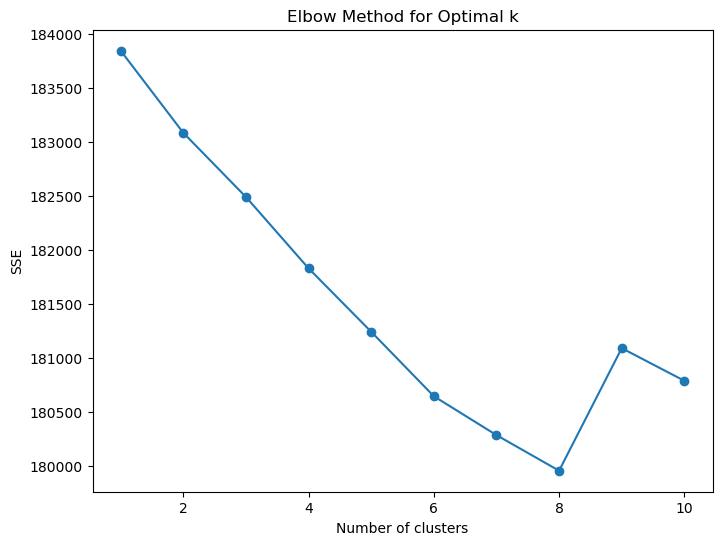

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

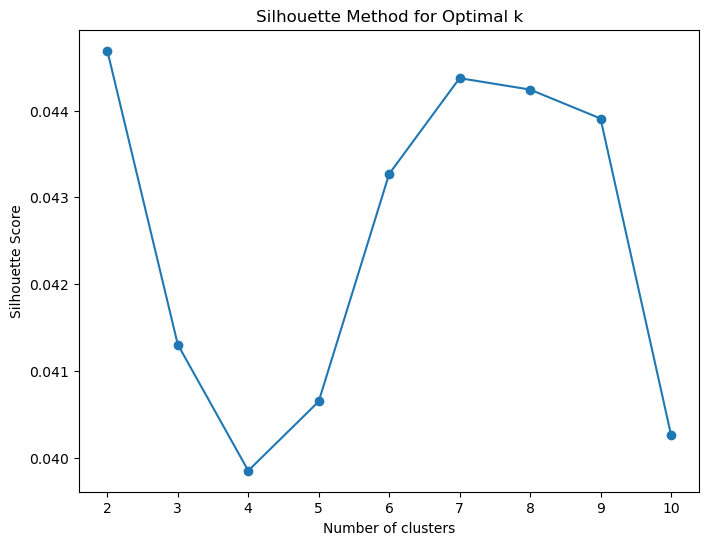

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


nltk.download('stopwords')

# Memuat data
url = 'https://drive.google.com/uc?id=19gyow7mP0kz88RzLFWBtOY5U46pmgYZH'
data = pd.read_json(url, lines=True)
# Definisikan fungsi untuk pra-pemrosesan
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    return ' '.join(words)

data['preprocessed_description'] = data['short_description'].apply(preprocess_text)

# Inisialisasi dan terapkan TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(data['preprocessed_description'])

# Metode Elbow
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

# Metode Silhouette
silhouette_avg = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_tfidf)
    silhouette_avg.append(silhouette_score(X_tfidf, cluster_labels))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_avg, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()